

# RFM Analysis

## What is RFM?

RFM stands for:
- **Recency**: How recently a customer made a purchase.
- **Frequency**: How often a customer makes a purchase.
- **Monetary**: How much a customer spends on purchases.

The goal of RFM analysis is to segment customers into meaningful categories based on these three metrics.

## Dataset Overview

The dataset contains:
- `customer_id`: Unique identifier for each customer.
- `trans_date`: The date on which the transaction occurred.
- `tran_amount`: The amount spent on each transaction.


<style>
@import url('https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;500;600;700&display=swap');

body,
div,
h1,
h2,
h3,
h4,
h5,
h6,
p,
span,
label,
input,
textarea,
button,
pre,
code,
kbd,
samp {
    font-family: 'Poppins', sans-serif !important;
}
</style>
## 1. Data Preparation

First, load the dataset and inspect its structure.

In [8]:
import pandas as pd
import numpy as np
import datetime as dt
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv('Retail_Data_Transactions.csv')
df1 = pd.read_csv('Retail_Data_Response.csv')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  125000 non-null  object
 1   trans_date   125000 non-null  object
 2   tran_amount  125000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.9+ MB


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6884 entries, 0 to 6883
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  6884 non-null   object
 1   response     6884 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 107.7+ KB


In [16]:
df = pd.merge(df, df1, how='left', on='customer_id')

In [18]:
df.head()

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0


In [20]:
df.isna().sum()
df.fillna(0, inplace=True)

In [22]:
df['response'] = df['response'].astype('int')
df['trans_date'] = pd.to_datetime(df['trans_date'])

In [23]:
df.duplicated().sum()

6

In [24]:
df[df.duplicated()]

,customer_id,trans_date,tran_amount,response
14324,CS2700,2011-10-23,48,1
59852,CS3458,2015-02-11,40,0
77236,CS2761,2014-03-03,75,0
91603,CS2565,2012-09-14,67,0
105496,CS7782,2014-12-30,70,0
121962,CS8394,2013-07-14,16,0


In [25]:
df.drop_duplicates(inplace=True)

In [30]:
display(df['trans_date'].min())
display(df['trans_date'].max())
display(df['trans_date'].max()-df['trans_date'].min())

Timestamp('2011-05-16 00:00:00')

Timestamp('2015-03-16 00:00:00')

Timedelta('1400 days 00:00:00')

In [32]:
df['Month'] = df['trans_date'].dt.strftime('%Y-%m')
monthly_response = df.groupby(['Month', 'response'])['customer_id'].count().unstack(fill_value=0)
monthly_response['Total'] = monthly_response[0] + monthly_response[1]
monthly_response['Response_Rate'] = monthly_response[1] / monthly_response['Total']

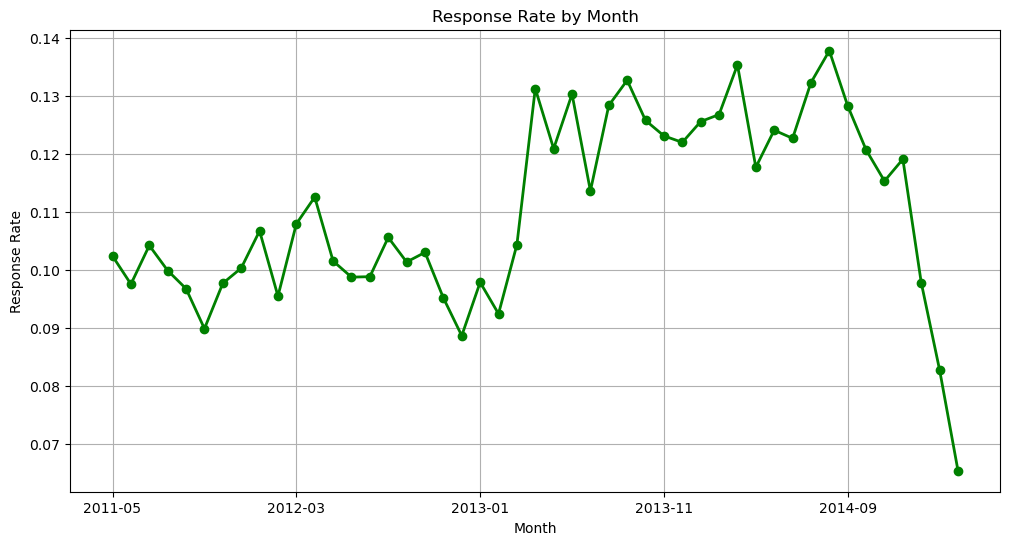

response     0    1  Total  Response_Rate
Month                                    
2011-05   1333  152   1485       0.102357
2011-06   2443  264   2707       0.097525
2011-07   2442  284   2726       0.104182
2011-08   2623  291   2914       0.099863
2011-09   2353  252   2605       0.096737
2011-10   2583  255   2838       0.089852
2011-11   2319  251   2570       0.097665
2011-12   2530  282   2812       0.100284
2012-01   2445  292   2737       0.106686
2012-02   2369  250   2619       0.095456
2012-03   2447  296   2743       0.107911
2012-04   2319  294   2613       0.112514
2012-05   2452  277   2729       0.101502
2012-06   2410  264   2674       0.098728
2012-07   2499  274   2773       0.098810
2012-08   2474  292   2766       0.105568
2012-09   2421  273   2694       0.101336
2012-10   2517  289   2806       0.102994
2012-11   2444  257   2701       0.095150
2012-12   2447  238   2685       0.088641
2013-01   2545  276   2821       0.097838
2013-02   2249  229   2478       0

In [33]:
plt.figure(figsize=(12, 6))
monthly_response['Response_Rate'].plot(kind='line', marker='o', color='green', linewidth=2)
plt.title('Response Rate by Month')
plt.xlabel('Month')
plt.ylabel('Response Rate')
plt.grid(True)
plt.show()

print(monthly_response)

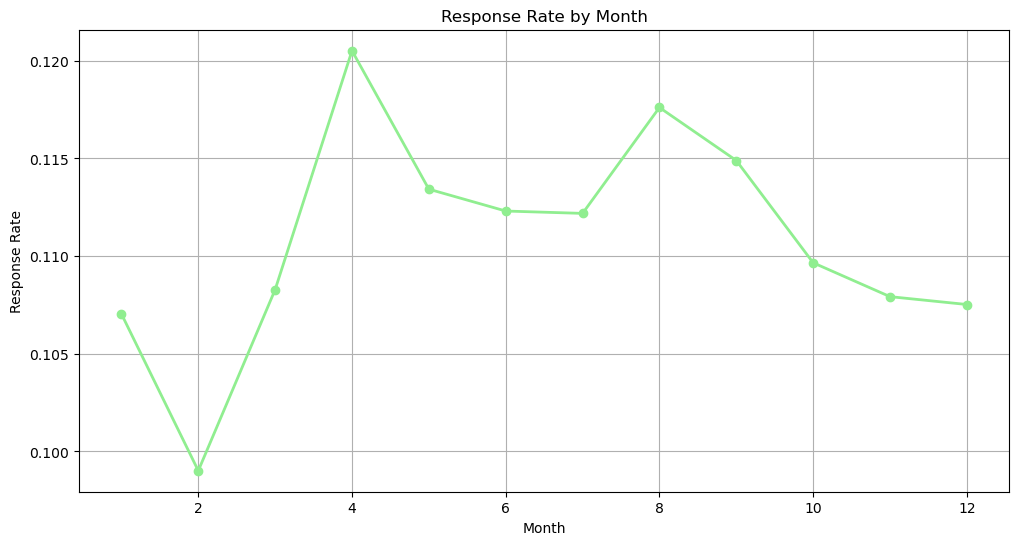

response     0     1  Total  Response_Rate
Month                                     
1         9952  1193  11145       0.107044
2         8954   984   9938       0.099014
3         8696  1056   9752       0.108285
4         7013   961   7974       0.120517
5         8590  1099   9689       0.113428
6         9548  1208  10756       0.112309
7         9797  1238  11035       0.112188
8         9881  1317  11198       0.117610
9         9460  1228  10688       0.114895
10        9954  1226  11180       0.109660
11        9522  1152  10674       0.107926
12        9786  1179  10965       0.107524


In [36]:
df['Month'] = df['trans_date'].dt.month
monthly_response = df.groupby(['Month', 'response'])['customer_id'].count().unstack(fill_value=0)
monthly_response['Total'] = monthly_response[0] + monthly_response[1]
monthly_response['Response_Rate'] = monthly_response[1] / monthly_response['Total']
plt.figure(figsize=(12, 6))
monthly_response['Response_Rate'].plot(kind='line', marker='o', color='lightgreen', linewidth=2)
plt.title('Response Rate by Month')
plt.xlabel('Month')
plt.ylabel('Response Rate')
plt.grid(True)
plt.show()

print(monthly_response)

In [39]:
data = df.copy()
data['trans_date'] = pd.to_datetime(data['trans_date'])

data.set_index('trans_date', inplace=True)
monthly_data = data.resample('M').agg({
    'tran_amount': 'mean',
    'response': 'mean'
})

tran_amount_decompose = seasonal_decompose(monthly_data['tran_amount'].dropna(), model='additive', period=12)

plt.figure(figsize=(12, 10))
tran_amount_decompose.plot()
# plt.suptitle('Seasonal Decomposition of Transaction Amount (2013-2015)', fontsize=16)
plt.show()

NameError: name 'seasonal_decompose' is not defined

**Trend**: Menunjukkan pola perubahan rata-rata transaksi selama periode 2013–2015.

**Seasonal**: Menampilkan pola musiman yang berulang setiap tahun.

**Residual**: Variasi data yang tidak dijelaskan oleh trend dan seasonal.

<Figure size 1200x1000 with 0 Axes>

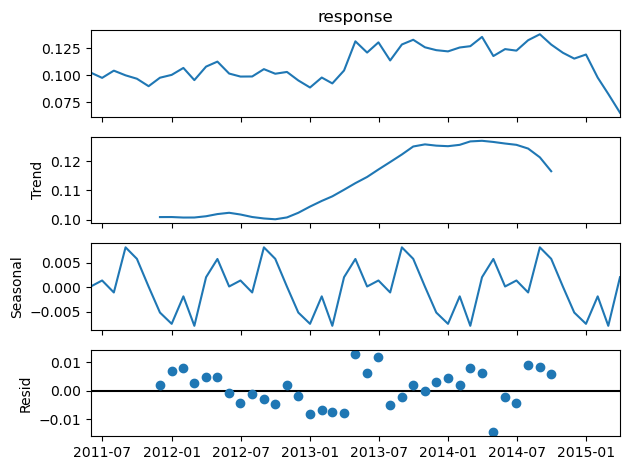

In [288]:
response_decompose = seasonal_decompose(monthly_data['response'].dropna(), model='additive', period=12)

plt.figure(figsize=(12, 10))
response_decompose.plot()
# plt.suptitle('Seasonal Decomposition of Response (2013-2015)', fontsize=16)
plt.show()


**Trend** : Menggambarkan perubahan tingkat respons secara keseluruhan.

**Seasonal** : Pola musiman dalam tingkat respons.

**Residual**: Sisa variasi yang tidak terjelaskan.


In [290]:
data['tran_amount'].corr(data['response'])

0.062387114508114856

<style>
@import url('https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;500;600;700&display=swap');

body,
div,
h1,
h2,
h3,
h4,
h5,
h6,
p,
span,
label,
input,
textarea,
button,
pre,
code,
kbd,
samp {
    font-family: 'Poppins', sans-serif !important;
}
</style>
## 2. Calculate RFM Metrics

### Recency:
Recency represents how recently a customer made a purchase. It is calculated by taking the difference between the current reference date (which is the latest transaction date in the dataset) and the most recent transaction date for each customer.

### Frequency:
Frequency measures how often a customer makes purchases. It is calculated by counting the number of transactions made by each customer.

### Monetary:
Monetary represents the total amount spent by a customer. It is calculated by summing the transaction amounts for each customer.

At this stage, we group the dataset by `customer_id` and calculate the Recency, Frequency, and Monetary values for each customer.


In [282]:
reference_date = df['trans_date'].max() + dt.timedelta(days=1)

In [292]:
# Aggregate the data with descriptive column names
rfm_df = df.groupby('customer_id').agg(
    Last_Purchase_Date=('trans_date', 'max'),  # Get the date of the most recent transaction
    Frequency=('trans_date', 'count'),         # Count the total number of transactions
    Monetary=('tran_amount', 'sum'),            # Sum the total amount spent
    Response = ('response','max')
).reset_index()

# Calculate Recency as the number of days between the reference date and the last purchase date
rfm_df['Recency'] = (reference_date - rfm_df['Last_Purchase_Date']).dt.days

# Reorder columns to have Recency in the correct place
rfm_df = rfm_df[['customer_id', 'Recency', 'Frequency', 'Monetary', 'Response']]

rfm_df.head()

,customer_id,Recency,Frequency,Monetary,Response
0,CS1112,62,15,1012,0
1,CS1113,36,20,1490,0
2,CS1114,33,19,1432,1
3,CS1115,12,22,1659,1
4,CS1116,204,13,857,1


In [293]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6889 entries, 0 to 6888
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  6889 non-null   object
 1   Recency      6889 non-null   int64 
 2   Frequency    6889 non-null   int64 
 3   Monetary     6889 non-null   int64 
 4   Response     6889 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 269.2+ KB


In [294]:
print("Perbedaan customer yang mempunyai tingkat kepuasan terhadap campaign adalah", len(rfm_df), "banding", 
len(rfm_df[rfm_df['Response']==1]))

Perbedaan customer yang mempunyai tingkat kepuasan terhadap campaign adalah 6889 banding 647


In [295]:
rfm_df[['Recency','Frequency','Monetary']].describe()

,Recency,Frequency,Monetary
count,6889.000000,6889.000000,6889.000000
mean,81.538249,18.143998,1179.223835
std,85.382526,5.193150,465.833636
min,1.000000,4.000000,149.000000
25%,23.000000,14.000000,781.000000
50%,54.000000,18.000000,1227.000000
75%,112.000000,22.000000,1520.000000
max,858.000000,39.000000,2933.000000


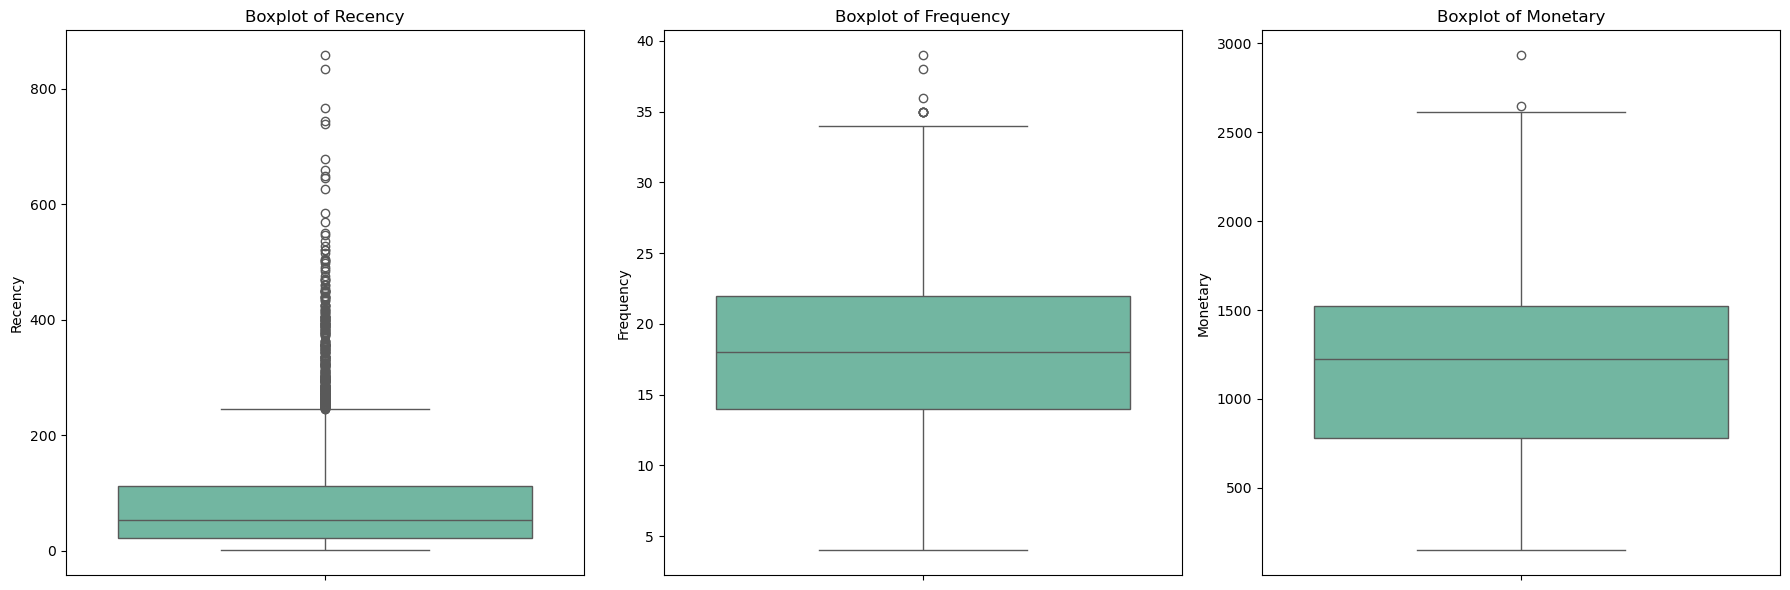

In [296]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.boxplot(y=rfm_df['Recency'], palette='Set2')
plt.title('Boxplot of Recency')

plt.subplot(1, 3, 2)
sns.boxplot(y=rfm_df['Frequency'], palette='Set2')
plt.title('Boxplot of Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(y=rfm_df['Monetary'], palette='Set2')
plt.title('Boxplot of Monetary')

plt.tight_layout()
plt.show()

**Dari visualisasi ini yang bisa didapatkan adalah kalau recency kebanyakan customer mempunyai data yang lebih beragam dibanding frequency dan monetari, dan bisa dilihat juga kalau frequency dan monetary mempunyai data yang linear**

Response                   0            1
Recency   count  6242.000000   647.000000
          mean     80.964434    87.074189
          std      86.921117    68.603275
          min       1.000000     1.000000
          25%      22.000000    32.000000
          50%      53.000000    72.000000
          75%     110.000000   122.000000
          max     858.000000   433.000000
Frequency count  6242.000000   647.000000
          mean     17.807273    21.392581
          std       5.157807     4.345077
          min       4.000000     5.000000
          25%      14.000000    19.000000
          50%      18.000000    21.000000
          75%      21.000000    24.000000
          max      39.000000    38.000000
Monetary  count  6242.000000   647.000000
          mean   1148.377603  1476.816074
          std     464.569504   361.673396
          min     149.000000   232.000000
          25%     740.000000  1290.000000
          50%    1188.000000  1493.000000
          75%    1490.000000  1689

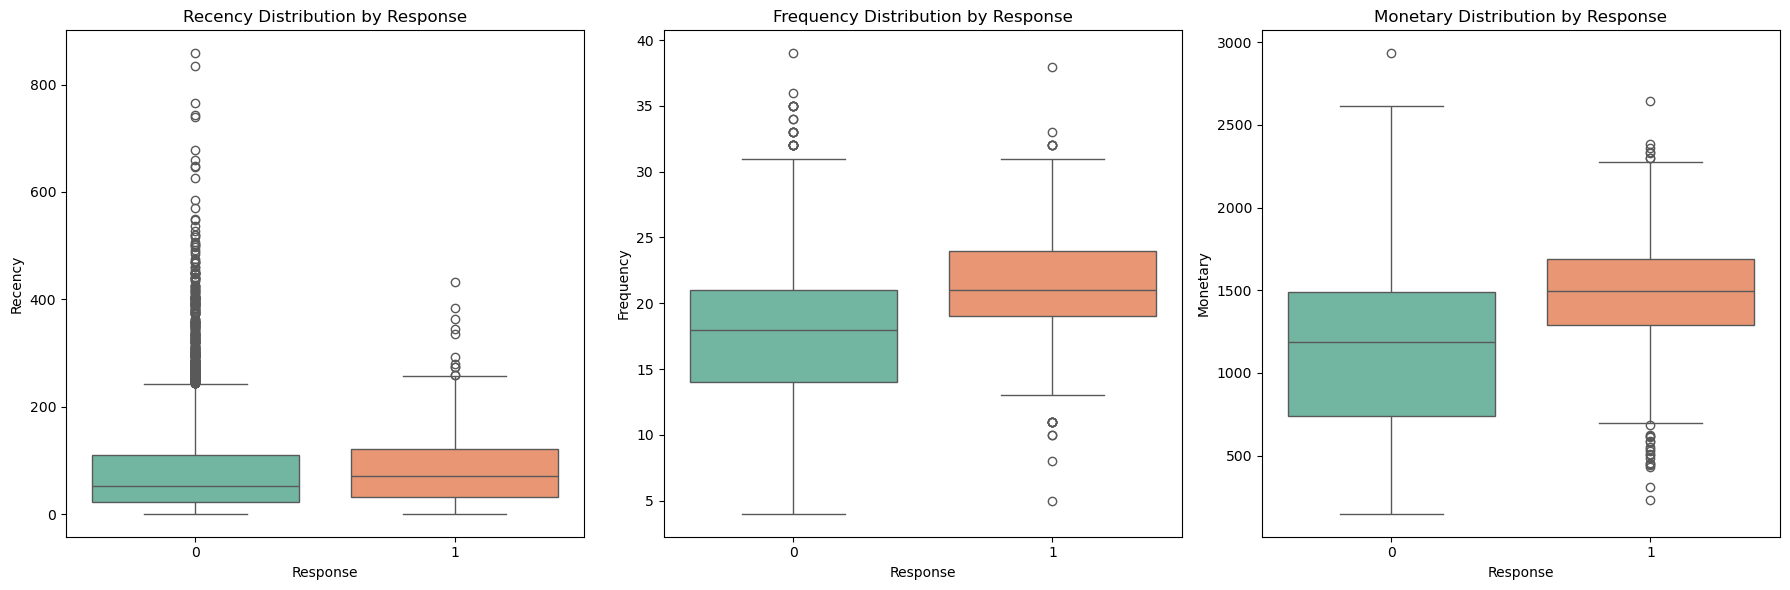

In [297]:
rfm_stats = rfm_df.groupby('Response')[['Recency', 'Frequency', 'Monetary']].describe().T
print(rfm_stats)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.boxplot(data=rfm_df, x='Response', y='Recency', palette='Set2')
plt.title('Recency Distribution by Response')

plt.subplot(1, 3, 2)
sns.boxplot(data=rfm_df, x='Response', y='Frequency', palette='Set2')
plt.title('Frequency Distribution by Response')

plt.subplot(1, 3, 3)
sns.boxplot(data=rfm_df, x='Response', y='Monetary', palette='Set2')
plt.title('Monetary Distribution by Response')

plt.tight_layout()
plt.show()

**Dari distribusi data ini bisa dilihat bahwa orang yang tidak interested mempunyai banyak outliers dibandingkan yang interested sehingga hasil rata rata not interested menjadi lebih kecil dibandingkan orang yang interested**

   Response    Recency  Frequency     Monetary
0         0  80.964434  17.807273  1148.377603
1         1  87.074189  21.392581  1476.816074


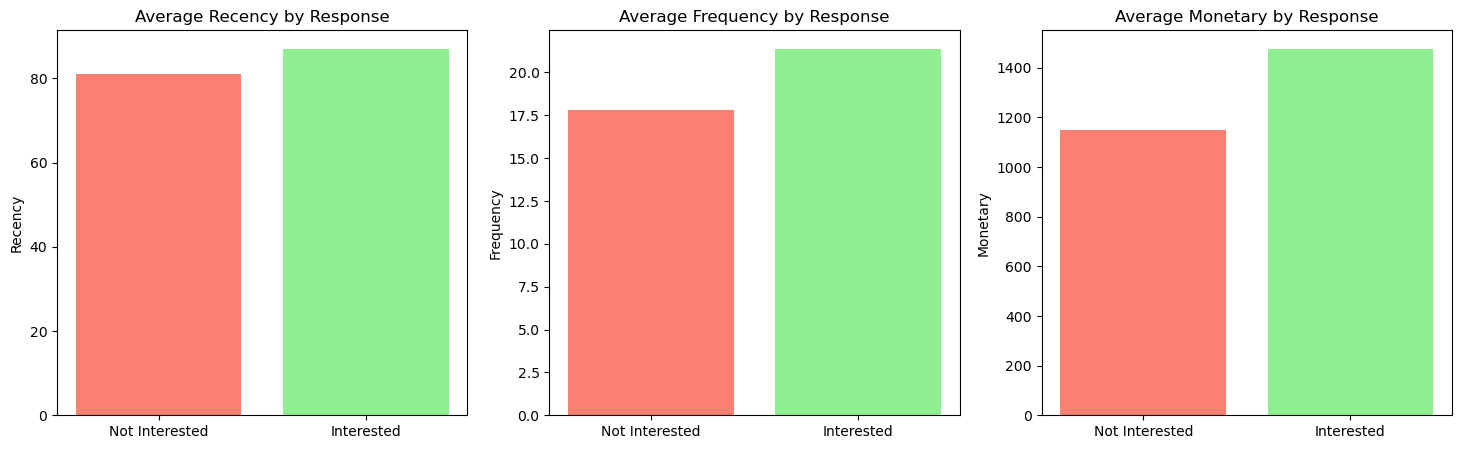

In [298]:
rfm_comparison = rfm_df.groupby('Response').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()

print(rfm_comparison)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
metrics = ['Recency', 'Frequency', 'Monetary']

for i, metric in enumerate(metrics):
    axes[i].bar(rfm_comparison['Response'], rfm_comparison[metric], color=['salmon', 'lightgreen'])
    axes[i].set_title(f'Average {metric} by Response')
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['Not Interested', 'Interested'])
    axes[i].set_ylabel(metric)

plt.show()

**bisa dilihat kalau orang yanng memang interested mempunyai RFM yang lebih baik dengan yang tidak walaupun proporsi orang yang interested itu jauh lebih kecil dibanding yang not interested**

In [299]:
from scipy.stats import ttest_ind

t_recency = ttest_ind(rfm_df[rfm_df['Response'] == 0]['Recency'],
                      rfm_df[rfm_df['Response'] == 1]['Recency'],
                      equal_var=False)

t_frequency = ttest_ind(rfm_df[rfm_df['Response'] == 0]['Frequency'],
                        rfm_df[rfm_df['Response'] == 1]['Frequency'],
                        equal_var=False)

t_monetary = ttest_ind(rfm_df[rfm_df['Response'] == 0]['Monetary'],
                       rfm_df[rfm_df['Response'] == 1]['Monetary'],
                       equal_var=False)

print("T-Test Results:")
print(f"Recency: t-statistic={t_recency.statistic:.3f}, p-value={t_recency.pvalue:.3f}")
print(f"Frequency: t-statistic={t_frequency.statistic:.3f}, p-value={t_frequency.pvalue:.3f}")
print(f"Monetary: t-statistic={t_monetary.statistic:.3f}, p-value={t_monetary.pvalue:.3f}")

T-Test Results:
Recency: t-statistic=-2.098, p-value=0.036
Frequency: t-statistic=-19.606, p-value=0.000
Monetary: t-statistic=-21.346, p-value=0.000


*p-value > 0.05: Tidak ada perbedaan signifikan.*

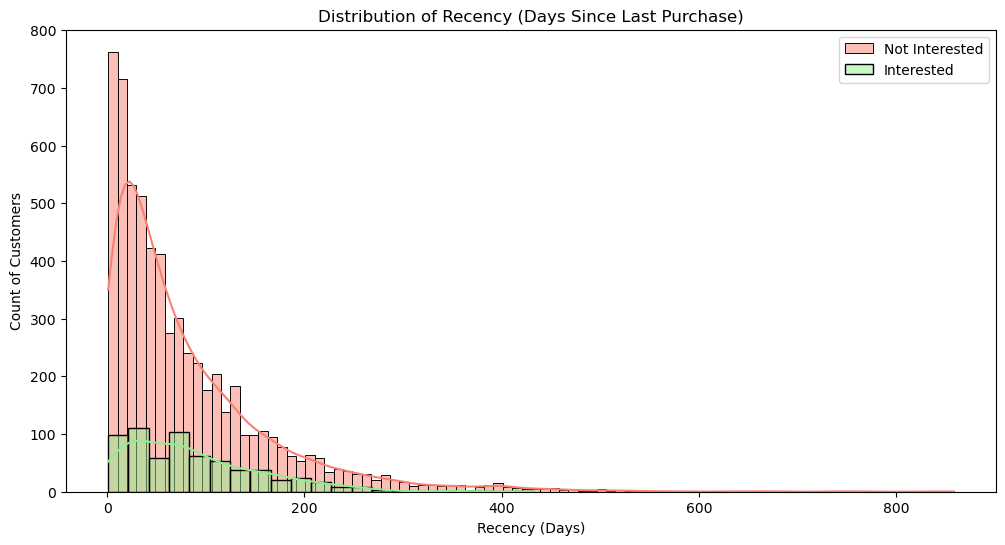

In [301]:
plt.figure(figsize=(12, 6))
sns.histplot(rfm_df[rfm_df['Response'] == 0]['Recency'], label='Not Interested', color='salmon', kde=True)
sns.histplot(rfm_df[rfm_df['Response'] == 1]['Recency'], label='Interested', color='lightgreen', kde=True)
plt.title('Distribution of Recency (Days Since Last Purchase)')
plt.xlabel('Recency (Days)')
plt.ylabel('Count of Customers')
plt.legend()
plt.show()

**campaign lebih baik buat segmentasi user yang udah lama transaksi ato bisa dibilang orang orang yang punya recency rendah punya respnse lebih baik**

### Korelasi & Trend

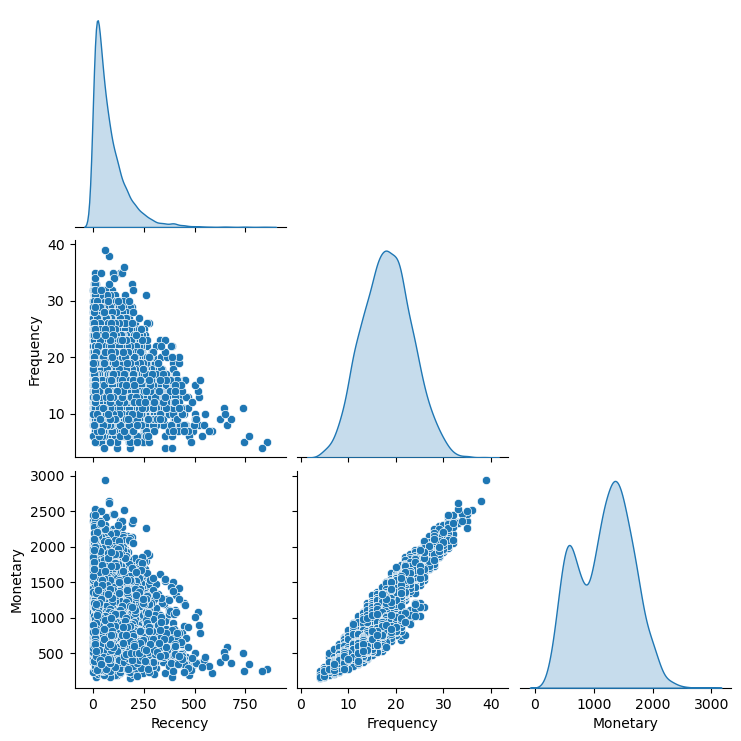

In [303]:
## Pairplot
sns.pairplot(rfm_df[['Recency', 'Frequency', 'Monetary']], diag_kind='kde', corner=True)
plt.show()

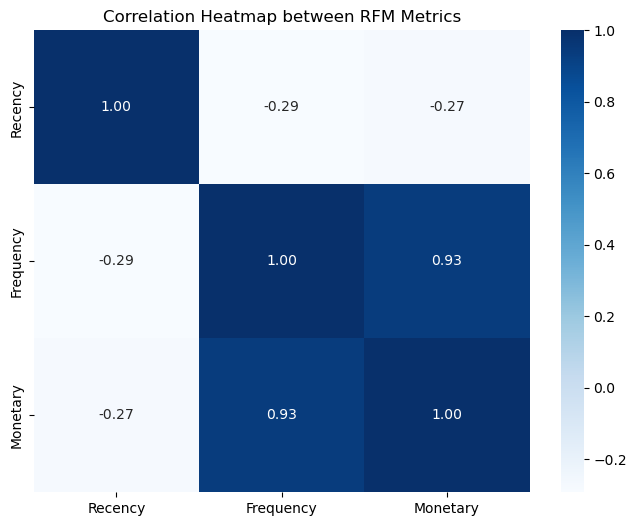

In [304]:
plt.figure(figsize=(8, 6))
sns.heatmap(rfm_df[['Recency', 'Frequency', 'Monetary']].corr(), annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Heatmap between RFM Metrics')
plt.show()

**Monetary berhubungna positif dengan Frequency sebesar 93% dan sebaliknya**

**Recency berkolerasi negatif dengan frequency 29%**

<style>
@import url('https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;500;600;700&display=swap');

body,
div,
h1,
h2,
h3,
h4,
h5,
h6,
p,
span,
label,
input,
textarea,
button,
pre,
code,
kbd,
samp {
    font-family: 'Poppins', sans-serif !important;
}
</style>
## 3. RFM Scoring

Once we have the RFM metrics, we assign a score between 1 and 5 for each metric. The scores are based on quintiles:
- **Recency**: Lower recency (more recent purchase) gets a higher score.
- **Frequency**: Higher frequency (more purchases) gets a higher score.
- **Monetary**: Higher monetary value (more money spent) gets a higher score.

These scores are then combined to create an RFM score for each customer.

In [541]:
rfm_df['R_Score_Norm'] = 1 - rfm_df['Recency'] / rfm_df['Recency'].max()
rfm_df['F_Score_Norm'] = rfm_df['Frequency'] / rfm_df['Frequency'].max()
rfm_df['M_Score_Norm'] = rfm_df['Monetary'] / rfm_df['Monetary'].max()

rfm_df['RFM_Score'] = (0.4 * rfm_df['R_Score_Norm'] + 0.4 * rfm_df['F_Score_Norm'] + 0.2 * rfm_df['M_Score_Norm']) * 5
rfm_df['RFM_Score'] = rfm_df['RFM_Score'].round().astype(int)

<style>
@import url('https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;500;600;700&display=swap');

body,
div,
h1,
h2,
h3,
h4,
h5,
h6,
p,
span,
label,
input,
textarea,
button,
pre,
code,
kbd,
samp {
    font-family: 'Poppins', sans-serif !important;
}
</style>
## 4. Combine RFM Scores

The next step involves combining the Recency, Frequency, and Monetary scores into a single RFM score. This score is generated by concatenating the Recency, Frequency, and Monetary scores for each customer. The resulting RFM score gives a comprehensive view of a customer’s behavior in terms of their engagement and value.

In [543]:
rfm_df

,customer_id,Recency,Frequency,Monetary,Response,R_Score,F_Score,M_Score,RFM_Score,Customer Segment,R_Score_Norm,F_Score_Norm,M_Score_Norm
0,CS1112,62,15,1012,0,3,2,2,3,Hibernating,0.927739,0.384615,0.345039
1,CS1113,36,20,1490,0,4,4,4,3,Loyal Customer,0.958042,0.512821,0.508012
2,CS1114,33,19,1432,1,4,3,4,3,Need Attention,0.961538,0.487179,0.488237
3,CS1115,12,22,1659,1,5,4,5,4,Champion,0.986014,0.564103,0.565632
4,CS1116,204,13,857,1,1,1,2,2,Lost,0.762238,0.333333,0.292192
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6884,CS8996,98,13,582,0,2,1,1,3,Hibernating,0.885781,0.333333,0.198432
6885,CS8997,262,14,543,0,1,2,1,2,Lost,0.694639,0.358974,0.185135
6886,CS8998,85,13,624,0,2,1,1,3,Hibernating,0.900932,0.333333,0.212751
6887,CS8999,258,12,383,0,1,1,1,2,Lost,0.699301,0.307692,0.130583


<style>
@import url('https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;500;600;700&display=swap');

body,
div,
h1,
h2,
h3,
h4,
h5,
h6,
p,
span,
label,
input,
textarea,
button,
pre,
code,
kbd,
samp {
    font-family: 'Poppins', sans-serif !important;
}
</style>
## 5. RFM Segmentation

In this step, we use combined RFM scores to segment customers into various groups. Each segment represents different customer behaviors based on recency, frequency, and monetary value.

Here are the common segments used in RFM analysis:

- **Hibernating**: Customers who have not made a purchase in a long time, with low frequency and monetary value.
- **At Risk**:  Previously active customers who have not made a purchase for a while, indicating potential churn or loss.
- **Cannot Lose Them**: Customers with high monetary value but low purchase frequency and who have not made a purchase for a long time, requiring special attention to prevent loss.
- **About to Sleep**: Customers with moderate recency and frequency who might stop transacting if not reactivated.
- **Need Attention**: Customers with good potential who need more attention and engagement to boost their activity.
- **Promising**: New customers who have the potential to become loyal or high-value customers.
- **Champion**: Top customers who purchase frequently, have made a recent purchase, and have high spending.
- **Loyal Customer**: Loyal customers who purchase frequently and have high monetary value.
- **Potential Loyalist**: Customers who are almost loyal but not fully, possibly with high frequency but still medium monetary value.
- **New Customers**: Customers who have just made a purchase and may still be exploring the product or brand.
- **Lost**: Customers who have not purchased in a long time, with low frequency and monetary value, and are likely to be lost or churn.

In [431]:
# # Create customer segments based on RFM score
# Champion = [555, 554, 544, 545, 454, 455, 445]
# Loyal_Customer = [543, 444, 435, 355, 354, 345, 344, 335]
# Potential_Loyalist = [553, 551, 552, 541, 542, 533, 532, 531, 452, 451, 442, 441, 431, 453, 433, 432, 423, 353, 352, 351, 342, 341, 333, 323]
# New_Customer = [512, 511, 422, 421, 412, 411, 311]
# Promising = [525, 524, 523, 522, 521, 515, 514, 513, 425,424, 413,414,415, 315, 314, 313]
# Need_Attention = [535, 534, 443, 434, 343, 334, 325, 324]
# Cannot_Lose_Them = [155, 154, 144, 214,215,115, 114, 113]
# About_to_Sleep = [331, 321, 312, 221, 213]
# At_Risk = [255, 254, 245, 244, 253, 252, 243, 242, 235, 234, 225, 224, 153, 152, 145, 143, 142, 135, 134, 133, 125, 124]
# Hibernating = [332, 322, 231, 241, 251, 233, 232, 223, 222, 132, 123, 122, 212, 211]
# Lost = [111, 112, 121, 131, 141, 151]

# # Create a function to assign customers to various customer segments based on RFM score
# def assign_cust_seg(col):
#     list_col = list(col)
#     segment = list()
#     for score in list_col:
#         if score in Champion:
#             value = 'Champion'
#         elif score in Loyal_Customer:
#             value = 'Loyal Customer'
#         elif score in Potential_Loyalist:
#             value = 'Potential Loyalist'
#         elif score in New_Customer:
#             value = 'New Customer'
#         elif score in Promising:
#             value = 'Promising'
#         elif score in Need_Attention:
#             value = 'Need Attention'
#         elif score in Cannot_Lose_Them:
#             value = 'Cannot Lose Them'
#         elif score in About_to_Sleep:
#             value = 'About to Sleep'
#         elif score in At_Risk:
#             value = 'At Risk'
#         elif score in Hibernating:
#             value = 'Hibernating'
#         elif score in Lost:
#             value = 'Lost'
#         else:
#             value = 'null'
#         segment.append(value)
#     return segment

# # Assign customers to segments based on their RFM score
# rfm_df['Customer Segment'] = assign_cust_seg(rfm_df['RFM_Score'].astype(int))
# rfm_df.head(5)

,customer_id,Recency,Frequency,Monetary,Response,R_Score,F_Score,M_Score,RFM_Score,Customer Segment
0,CS1112,62,15,1012,0,3,2,2,322,Hibernating
1,CS1113,36,20,1490,0,4,4,4,444,Loyal Customer
2,CS1114,33,19,1432,1,4,3,4,434,Need Attention
3,CS1115,12,22,1659,1,5,4,5,545,Champion
4,CS1116,204,13,857,1,1,1,2,112,Lost


In [433]:
pd.DataFrame(rfm_df['Customer Segment'].value_counts())

,count
Customer Segment,
Hibernating,1229
Champion,1029
At Risk,810
Potential Loyalist,800
Loyal Customer,776
New Customer,727
Lost,566
Promising,275
Cannot Lose Them,254


<style>
@import url('https://fonts.googleapis.com/css2?family=Poppins:wght@300;400;500;600;700&display=swap');

body,
div,
h1,
h2,
h3,
h4,
h5,
h6,
p,
span,
label,
input,
textarea,
button,
pre,
code,
kbd,
samp {
    font-family: 'Poppins', sans-serif !important;
}
</style>
## 6. Analyze the Segments

Once customers are segmented, we analyze each segment to understand their behavior:
- **Recency**: How recently customers in each segment have purchased.
- **Frequency**: How often customers in each segment make purchases.
- **Monetary**: How much customers in each segment spend.

This analysis provides insights into which customer groups need more attention and which are high-value, helping businesses tailor their marketing strategies.

In [569]:
# Normalisasi masing-masing dimensi
rfm_df['R_Score_Norm'] = 1 - rfm_df['Recency'] / rfm_df['Recency'].max()
rfm_df['F_Score_Norm'] = rfm_df['Frequency'] / rfm_df['Frequency'].max()
rfm_df['M_Score_Norm'] = rfm_df['Monetary'] / rfm_df['Monetary'].max()

# Menghitung Weighted RFM Score
rfm_df['Weighted_RFM_Score'] = (0.4 * rfm_df['R_Score_Norm'] +
                                 0.4 * rfm_df['F_Score_Norm'] +
                                 0.2 * rfm_df['M_Score_Norm']) * 100

# Konversi ke integer untuk segmentasi
rfm_df['RFM_Score'] = rfm_df['Weighted_RFM_Score'].round().astype(int)


In [571]:
def assign_cust_seg(col):
    list_col = list(col)
    segment = list()
    for score in list_col:
        if score >= 90:  # Champion
            value = 'Champion'
        elif score >= 80 and score < 90:  # Loyal Customer
            value = 'Loyal Customer'
        elif score >= 70 and score < 80:  # Potential Loyalist
            value = 'Potential Loyalist'
        elif score >= 60 and score < 70:  # Promising
            value = 'Promising'
        elif score >= 50 and score < 60:  # Need Attention
            value = 'Need Attention'
        elif score >= 40 and score < 50:  # At Risk
            value = 'At Risk'
        elif score >= 30 and score < 40:  # Hibernating
            value = 'Hibernating'
        else:  # Lost
            value = 'Lost'
        segment.append(value)
    return segment


In [442]:
# pip install squarify --quiet

In [573]:
rfm_df['Customer Segment'] = assign_cust_seg(rfm_df['RFM_Score'])

In [575]:
print(rfm_df['Customer Segment'].value_counts())

Customer Segment
Promising             2634
Need Attention        1746
Potential Loyalist    1576
At Risk                525
Loyal Customer         260
Hibernating            112
Lost                    28
Champion                 8
Name: count, dtype: int64


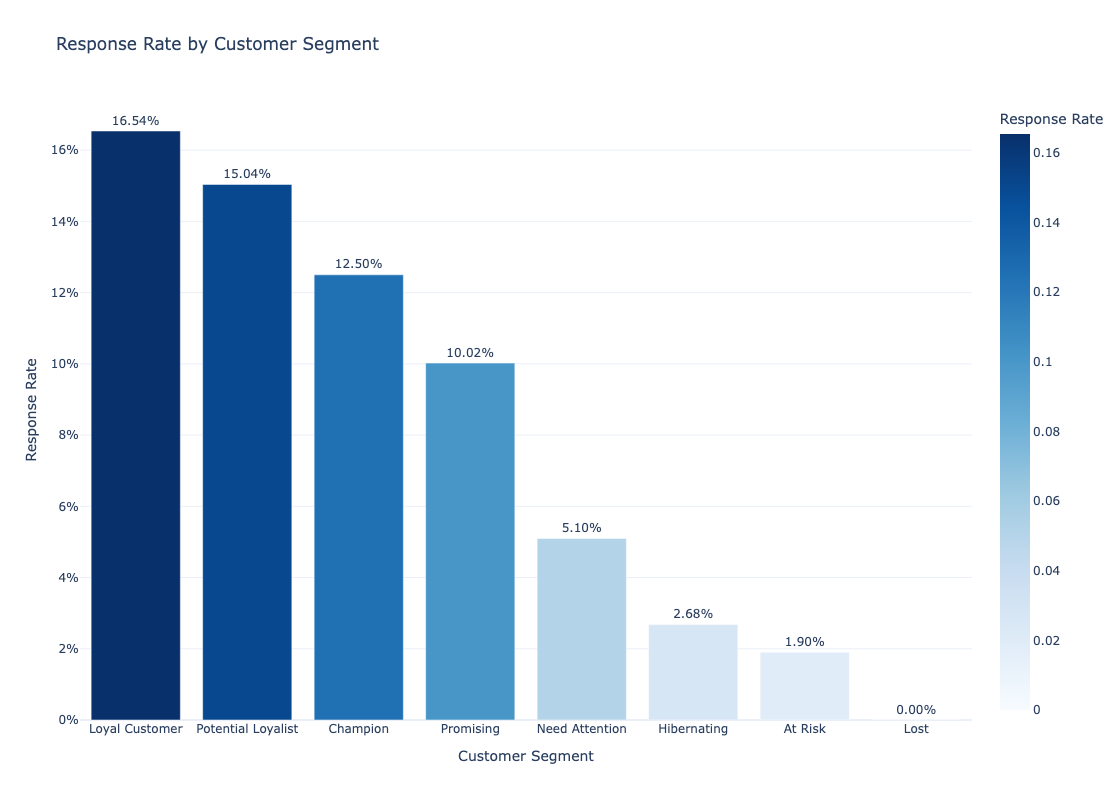

In [577]:
stack = rfm_df.groupby(['Customer Segment', 'Response']).size().unstack(fill_value=0)
stack['Total'] = stack[0] + stack[1]
stack['Response_Rate'] = stack[1] / stack['Total']
stacked = stack.reset_index()
stacked = stacked[['Customer Segment','Response_Rate']]
stack_sorted = stacked.sort_values(by='Response_Rate', ascending=False)

# Plot with Plotly
fig = px.bar(
    stack_sorted,
    x='Customer Segment',
    y='Response_Rate',
    title='Response Rate by Customer Segment',
    labels={'Response_Rate': 'Response Rate', 'Customer Segment': 'Segment'},
    text=stack_sorted['Response_Rate'].apply(lambda x: f'{x:.2%}'),
    color='Response_Rate',
    color_continuous_scale='Blues'
)

fig.update_traces(textposition='outside')

fig.update_layout(
    xaxis_title='Customer Segment',
    yaxis_title='Response Rate',
    yaxis_tickformat='.0%',  # Format y-axis as percentage
    template='plotly_white',
    width=1000,  
    height=800  
)

fig.show()

In [579]:
rfm_df

,customer_id,Recency,Frequency,Monetary,Response,R_Score,F_Score,M_Score,RFM_Score,Customer Segment,R_Score_Norm,F_Score_Norm,M_Score_Norm,Weighted_RFM_Score
0,CS1112,62,15,1012,0,3,2,2,59,Need Attention,0.927739,0.384615,0.345039,59.394957
1,CS1113,36,20,1490,0,4,4,4,69,Promising,0.958042,0.512821,0.508012,68.994744
2,CS1114,33,19,1432,1,4,3,4,68,Promising,0.961538,0.487179,0.488237,67.713464
3,CS1115,12,22,1659,1,5,4,5,73,Potential Loyalist,0.986014,0.564103,0.565632,73.317311
4,CS1116,204,13,857,1,1,1,2,50,Need Attention,0.762238,0.333333,0.292192,49.666690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6884,CS8996,98,13,582,0,2,1,1,53,Need Attention,0.885781,0.333333,0.198432,52.733202
6885,CS8997,262,14,543,0,1,2,1,46,At Risk,0.694639,0.358974,0.185135,45.847216
6886,CS8998,85,13,624,0,2,1,1,54,Need Attention,0.900932,0.333333,0.212751,53.625658
6887,CS8999,258,12,383,0,1,1,1,43,At Risk,0.699301,0.307692,0.130583,42.891381


In [581]:
rfm_df[['Recency','Frequency','Monetary']].describe()

,Recency,Frequency,Monetary
count,6889.000000,6889.000000,6889.000000
mean,81.538249,18.143998,1179.223835
std,85.382526,5.193150,465.833636
min,1.000000,4.000000,149.000000
25%,23.000000,14.000000,781.000000
50%,54.000000,18.000000,1227.000000
75%,112.000000,22.000000,1520.000000
max,858.000000,39.000000,2933.000000


In [583]:
rfm_df[rfm_df['RFM_Score']>90]

,customer_id,Recency,Frequency,Monetary,Response,R_Score,F_Score,M_Score,RFM_Score,Customer Segment,R_Score_Norm,F_Score_Norm,M_Score_Norm,Weighted_RFM_Score
1901,CS3013,8,35,2259,0,5,5,5,91,Champion,0.990676,0.897436,0.770201,90.928499
3208,CS4320,81,38,2647,1,2,5,5,93,Champion,0.905594,0.974359,0.902489,93.247914
3312,CS4424,57,39,2933,0,3,5,5,97,Champion,0.933566,1.000000,1.000000,97.342657
3548,CS4660,11,33,2527,0,5,5,5,91,Champion,0.987179,0.846154,0.861575,90.564837
3997,CS5109,41,35,2506,0,3,5,5,91,Champion,0.952214,0.897436,0.854415,91.074319


In [585]:
rfm_df[rfm_df['RFM_Score']>80]

,customer_id,Recency,Frequency,Monetary,Response,R_Score,F_Score,M_Score,RFM_Score,Customer Segment,R_Score_Norm,F_Score_Norm,M_Score_Norm,Weighted_RFM_Score
67,CS1179,47,29,2091,0,3,5,5,82,Loyal Customer,0.945221,0.743590,0.712922,81.810886
72,CS1184,1,28,1999,0,5,5,5,82,Loyal Customer,0.998834,0.717949,0.681555,82.302423
103,CS1215,134,35,2362,0,1,5,5,86,Loyal Customer,0.843823,0.897436,0.805319,85.756725
128,CS1240,4,30,2126,0,5,5,5,85,Loyal Customer,0.995338,0.769231,0.724855,85.079853
182,CS1294,35,30,2129,0,4,5,5,84,Loyal Customer,0.959207,0.769231,0.725878,83.655088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4878,CS5990,39,32,2326,0,4,5,5,87,Loyal Customer,0.954545,0.820513,0.793045,86.863224
4879,CS5991,1,29,1970,0,5,5,5,83,Loyal Customer,0.998834,0.743590,0.671667,83.130314
4897,CS6009,35,29,1945,1,4,5,5,81,Loyal Customer,0.959207,0.743590,0.663144,81.374759
4905,CS6017,3,28,2109,0,5,5,5,83,Loyal Customer,0.996503,0.717949,0.719059,82.959268


Response               0    1  Total  Response_Rate
Customer Segment                                   
Loyal Customer       217   43    260       0.165385
Potential Loyalist  1339  237   1576       0.150381
Champion               7    1      8       0.125000
Promising           2370  264   2634       0.100228
Need Attention      1657   89   1746       0.050974
Hibernating          109    3    112       0.026786
At Risk              515   10    525       0.019048
Lost                  28    0     28       0.000000


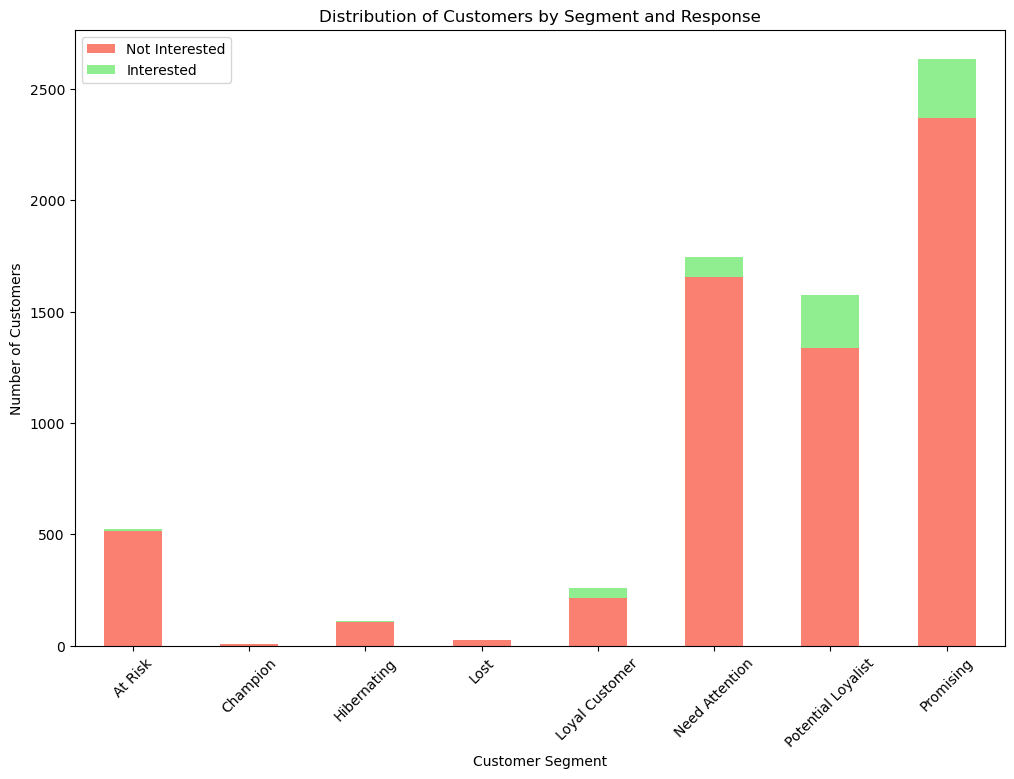

In [587]:
stack = rfm_df.groupby(['Customer Segment', 'Response']).size().unstack(fill_value=0)
stack['Total'] = stack[0] + stack[1]
stack['Response_Rate'] = stack[1] / stack['Total']

print(stack.sort_values(by='Response_Rate', ascending=False))
stack[[0, 1]].plot(kind='bar', stacked=True, figsize=(12, 8), color=['salmon', 'lightgreen'])
plt.title('Distribution of Customers by Segment and Response')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.legend(['Not Interested', 'Interested'])
plt.xticks(rotation=45)
plt.show()

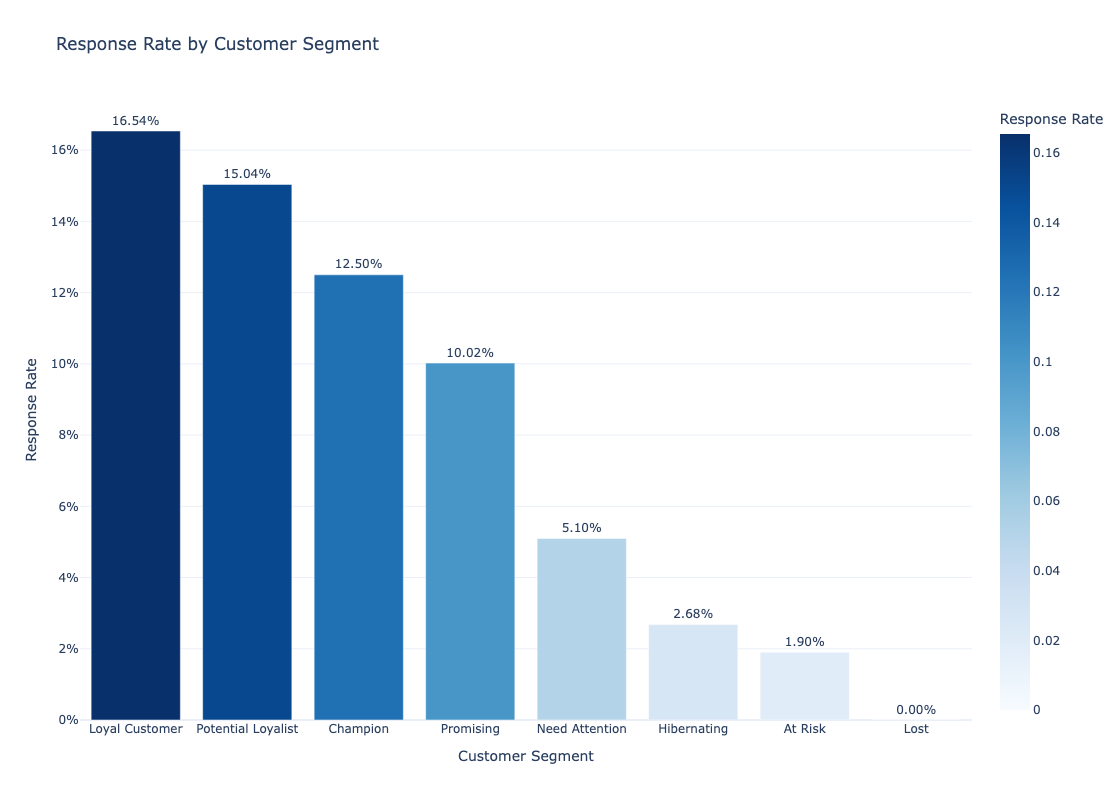

In [589]:
stacked = stack.reset_index()
stacked = stacked[['Customer Segment','Response_Rate']]
stack_sorted = stacked.sort_values(by='Response_Rate', ascending=False)

# Plot with Plotly
fig = px.bar(
    stack_sorted,
    x='Customer Segment',
    y='Response_Rate',
    title='Response Rate by Customer Segment',
    labels={'Response_Rate': 'Response Rate', 'Customer Segment': 'Segment'},
    text=stack_sorted['Response_Rate'].apply(lambda x: f'{x:.2%}'),
    color='Response_Rate',
    color_continuous_scale='Blues'
)

fig.update_traces(textposition='outside')

fig.update_layout(
    xaxis_title='Customer Segment',
    yaxis_title='Response Rate',
    yaxis_tickformat='.0%',  # Format y-axis as percentage
    template='plotly_white',
    width=1000,  
    height=800  
)

fig.show()

**Bisa dibilang dari campaign ini berhasil menargetkan untuk user yang memang hampir mau churn**

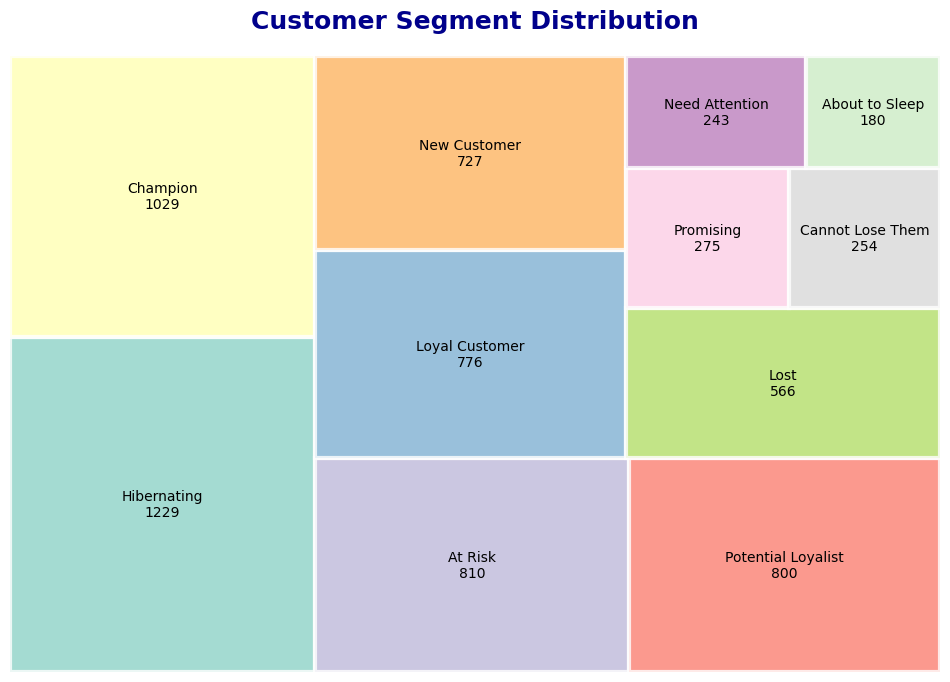

In [444]:
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

segment_counts = rfm_df['Customer Segment'].value_counts().reset_index()
segment_counts.columns = ['Customer Segment', 'count']

colors = sns.color_palette('Set3', len(segment_counts))
labels = [f"{seg}\n{cnt}" for seg, cnt in zip(segment_counts['Customer Segment'], segment_counts['count'])]

plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=segment_counts['count'],
    label=labels,  
    color=colors,
    alpha=0.8,
    edgecolor='white',
    linewidth=3
)

plt.axis('off')

plt.title(
    'Customer Segment Distribution',
    fontsize=18,
    fontweight='bold',
    color='darkblue',
    pad=20
)

plt.show()

**Dari Plot diatas bisa dibilang kalau dari store ini mempunyai banyak customer yang memang masih sering berbelanja ditoko namun, banyak juga customer yang sudah lama tidak bertransaksi di toko ini**

In [445]:
import plotly.express as px
import pandas as pd

# Data untuk segmentasi pelanggan
segment_summary = rfm_df.groupby('Customer Segment').agg(
    avg_days_since_purchase=('Recency', 'mean'),
    avg_sales_per_customer=('Monetary', 'mean'),
    customer_count=('customer_id', 'count')
).reset_index()

fig = px.scatter(
    segment_summary,
    x='avg_days_since_purchase',
    y='avg_sales_per_customer',
    size='customer_count', 
    color='Customer Segment',  
    text='Customer Segment',  #
    title='RFM Segmentation of Customers',
    size_max=110,
    hover_data={
        'avg_days_since_purchase': ':.1f',  
        'avg_sales_per_customer': ':.1f',
        'customer_count': True
    }
)


fig.update_layout(
    xaxis_title='Average Days Since the Last Purchase',
    yaxis_title='Average Sales per Customer',
    xaxis=dict(autorange='reversed'),  # Membalik sumbu x
    title=dict(
        font=dict(size=18, color='darkblue'),
        x=0.5,
        xanchor='center'
    ),
    width=1000,  
    height=800  
)


fig.show()

**disini bisa dilihat memang segmen champion adalah user yang paling berkontribusi untuk toko ini, namun yang perlu diperhatikan adalah banyak user yang berada di at risk sudah ingin menyamai user yang ada di hibernating**

In [449]:
RFM = rfm_df[['Recency','Frequency','Monetary']]

In [451]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 4, init = 'k-means++')
nclusters = km.fit_predict(RFM)
clusters = pd.DataFrame(nclusters, columns = ['clusters'], index = RFM.index)
rfmK= pd.concat([RFM, clusters], axis=1)

In [452]:
rfmK

,Recency,Frequency,Monetary,clusters
0,62,15,1012,2
1,36,20,1490,1
2,33,19,1432,1
3,12,22,1659,3
4,204,13,857,2
...,...,...,...,...
6884,98,13,582,0
6885,262,14,543,0
6886,85,13,624,0
6887,258,12,383,0


<Axes: xlabel='Frequency', ylabel='Monetary'>

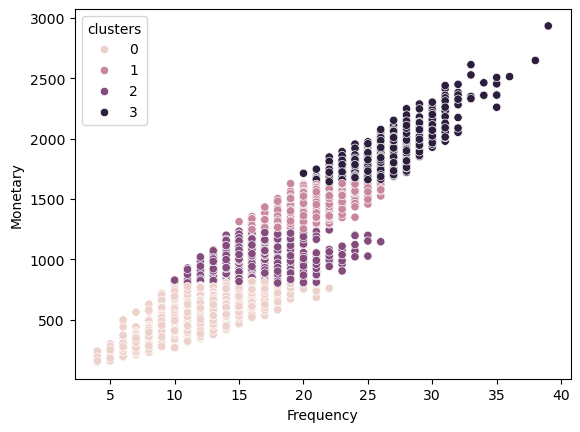

In [453]:
sns.scatterplot(data = rfmK, x='Frequency', y='Monetary', hue='clusters')

In [455]:
rfmK

,Recency,Frequency,Monetary,clusters
0,62,15,1012,2
1,36,20,1490,1
2,33,19,1432,1
3,12,22,1659,3
4,204,13,857,2
...,...,...,...,...
6884,98,13,582,0
6885,262,14,543,0
6886,85,13,624,0
6887,258,12,383,0


In [398]:
rfmK[rfmK['clusters']==0]['Monetary'].mean()

1434.8050228310503

In [409]:
rfmK[rfmK['clusters']==1]['Monetary'].mean()

562.9248903508771

In [413]:
rfmK[rfmK['clusters']==1]['Frequency'].mean()

12.338267543859649

In [411]:
rfmK[rfmK['clusters']==0]['Frequency'].mean()

20.47077625570776